<h1 align = "center"> TRANSFERMARKT DATA ANALYSIS </h1> 

<p center = "align"> <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Football_iu_1996.jpg/300px-Football_iu_1996.jpg"> </p>

In [226]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [227]:
leagues = pd.read_csv("datasets\\football\\leagues.csv")

In [228]:
leagues.head()

,league_id,name,confederation
0,L1,bundesliga,europa
1,NL1,eredivisie,europa
2,BE1,jupiler-pro-league,europa
3,ES1,laliga,europa
4,PO1,liga-nos,europa


In [229]:
leagues.rename(columns={"league_id":"domestic_competition_id"},inplace=True)

In [230]:
clubs = pd.read_csv("datasets\\football\\clubs.csv")

In [231]:
clubs.head()

,club_id,name,pretty_name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url
0,1032,fc-reading,Fc Reading,GB1,33.66,26,25.9,12,46.2,6,Select Car Leasing Stadium,24161,+£8.37m,Brian McDermott,https://www.transfermarkt.co.uk/fc-reading/sta...
1,2323,orduspor,Orduspor,TR1,NaN,0,NaN,0,NaN,0,19 Eylül Stadyum,11024,+-0,Héctor Cúper,https://www.transfermarkt.co.uk/orduspor/start...
2,1387,acn-siena-1904,Acn Siena 1904,IT1,4.32,30,26.2,6,20.0,2,Artemio Franchi,15373,£-6Th.,Serse Cosmi,https://www.transfermarkt.co.uk/acn-siena-1904...
3,3592,kryvbas-kryvyi-rig,Kryvbas Kryvyi Rig,UKR1,2.95,24,24.5,2,8.3,0,Shakhty Zhovtneva,2500,£-270Th.,Oleg Taran,https://www.transfermarkt.co.uk/kryvbas-kryvyi...
4,1071,wigan-athletic,Wigan Athletic,GB1,12.38,29,26.5,14,48.3,6,DW Stadium,25133,£-140Th.,Roberto Martínez,https://www.transfermarkt.co.uk/wigan-athletic...


## Let's get the Greek League Clubs

In [232]:
greek_league=clubs[clubs.domestic_competition_id=="GR1"]

In [233]:
greek_league=greek_league.drop(["domestic_competition_id","stadium_name","coach_name"],axis=1)

In [234]:
greek_league.columns

Index(['club_id', 'name', 'pretty_name', 'total_market_value', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_seats', 'net_transfer_record', 'url'],
      dtype='object')

## Which team has the highest market value?

In [235]:
greek_league[["name","total_market_value"]].sort_values(by="total_market_value",ascending=False).dropna()

,name,total_market_value
218,olympiakos-piraus,92.70
217,paok-thessaloniki,50.27
221,aek-athen,39.51
215,panathinaikos-athen,29.21
214,aris-thessaloniki,21.40
213,ofi-kreta,12.11
263,atromitos-athen,10.40
212,pas-giannina,9.05
210,panetolikos-gfs,8.73
211,asteras-tripolis,8.44


## Which team has the highest percentage of foreigners?

In [236]:
greek_league[["name","foreigners_percentage"]].sort_values(by="foreigners_percentage",ascending=False).dropna()

,name,foreigners_percentage
217,paok-thessaloniki,78.6
214,aris-thessaloniki,75.8
209,volos-nps,73.1
221,aek-athen,69.0
218,olympiakos-piraus,65.8
175,apollon-smyrnis,62.5
215,panathinaikos-athen,62.1
43,panthrakikos-komotini,60.0
211,asteras-tripolis,60.0
210,panetolikos-gfs,53.6


## That's a bit suprising ... I expected my favorite club (Aris FC) to be the first, because we rarely play with a greek player on the field. Let's find the greek players for the first two teams in the above ranking.

In [237]:
players = pd.read_csv("datasets\\football\\players.csv")

In [238]:
players.columns

Index(['player_id', 'last_season', 'current_club_id', 'name', 'pretty_name',
       'country_of_birth', 'country_of_citizenship', 'date_of_birth',
       'position', 'sub_position', 'foot', 'height_in_cm',
       'market_value_in_gbp', 'highest_market_value_in_gbp', 'url'],
      dtype='object')

In [239]:
players.drop("name",axis=1,inplace=True)
players.rename(columns={"current_club_id":"club_id","pretty_name":"name"},inplace=True)

In [240]:
players=pd.merge(players[["player_id","name","date_of_birth","club_id","country_of_citizenship","last_season","market_value_in_gbp","foot","height_in_cm","position"]],clubs[["club_id","name"]],how="inner",on="club_id",suffixes=("_player","_team"))

In [241]:
players

,player_id,name_player,date_of_birth,club_id,country_of_citizenship,last_season,market_value_in_gbp,foot,height_in_cm,position,name_team
0,254016,Arthur Delalande,1992-05-18,855,France,2013,NaN,Right,186,Midfield,ea-guingamp
1,225616,Paul Babiloni,1990-01-16,855,France,2013,NaN,Right,180,Defender,ea-guingamp
2,45264,Thierry Argelier,1986-07-08,855,France,2013,NaN,Right,183,Defender,ea-guingamp
3,6274,Gregory Cerdan,1982-07-28,855,France,2013,NaN,Right,190,Defender,ea-guingamp
4,1613,Vivian,1982-04-05,855,Brazil,2013,NaN,NaN,0,Defender,ea-guingamp
...,...,...,...,...,...,...,...,...,...,...,...
23706,699306,Ilya Tuseev,2002-07-19,3719,Russia,2021,135000.0,Right,194,Goalkeeper,fk-khimki
23707,178957,Bryan Idowu,1992-05-18,3719,Nigeria,2021,1080000.0,Right,179,Defender,fk-khimki
23708,232093,Reziuan Mirzov,1993-06-22,3719,Russia,2021,1350000.0,Right,179,Attack,fk-khimki
23709,260229,Egor Danilkin,1995-08-01,3719,Russia,2021,720000.0,Right,185,Defender,fk-khimki


## How many greek players Paok has?

In [242]:
players[(players.name_team=="paok-thessaloniki".lower()) & (players.last_season==2021)].groupby("country_of_citizenship")["name_player"].count()["Greece"]

6

## How many greek players Aris has?

In [243]:
players[(players.name_team=="aris-thessaloniki") & (players.last_season==2021)].groupby("country_of_citizenship")["name_player"].count()["Greece"]

8

### More specifically

In [244]:
players[(players.name_team=="aris-thessaloniki") & (players.last_season==2021) & (players.country_of_citizenship=="Greece")].name_player

7739           Dimitrios Manos
7747            Zisis Saliaris
7751    Konstantinos Mitroglou
7754       Christos Marmaridis
7760        Kyriakos Aslanidis
7764        Georgios Delizisis
7767           Marios Siabanis
7769      Panagiotis Sengergis
Name: name_player, dtype: object

In [245]:
players[(players.name_team=="paok-thessaloniki") & (players.last_season==2021) & (players.country_of_citizenship=="Greece")].name_player

5330         Georgios Koutsias
5344         Lefteris Lyratzis
5350       Giannis Michailidis
5352    Christos Talichmanidis
5353      Theocharis Tsingaras
5356    Alexandros Paschalakis
Name: name_player, dtype: object

# Let's see what are the most represented countries in greek league in terms of players

In [246]:
greek_teams = list(greek_league.name)

In [247]:
players_gr = players [ players.name_team.isin(greek_teams) & (players.last_season == 2021)]

In [248]:
sl_countries = players_gr.groupby("country_of_citizenship").count()["player_id"]

<AxesSubplot:title={'center':"Greek League's Foreigners"}>

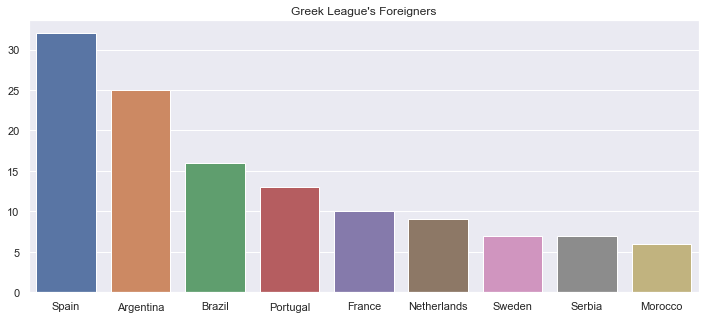

In [249]:
sl_countries = sl_countries.sort_values(ascending = False).iloc[1:10:1]
fig = plt.figure( figsize = (12,5))
ax = fig.gca()
ax.set_title("Greek League's Foreigners")
sns.barplot(x = list(sl_countries.index), y = sl_countries.values,ax = ax)

## We can do the same with other leagues 

In [250]:
def foreigners(country,ax):
    d={"England":"GB1","Spain":"ES1","Greece":"GR1","Germany":"GER1","Italy":"IT1","Turkey":"TU1","France":"FR1"}
    countries = list(clubs[clubs.domestic_competition_id ==f"{d[country]}"].name.unique())
    player_countries = players[players.name_team.isin(countries) & (players.last_season == 2021)]
    sum_countries = player_countries.groupby("country_of_citizenship").count()["player_id"]
    sum_countries = sum_countries.sort_values(ascending = False).iloc[1:10:1]
    ax.set_title(f"{country} League's Foreigners")
    sns.barplot(x = list(sum_countries.index), y = sum_countries.values,ax = ax)

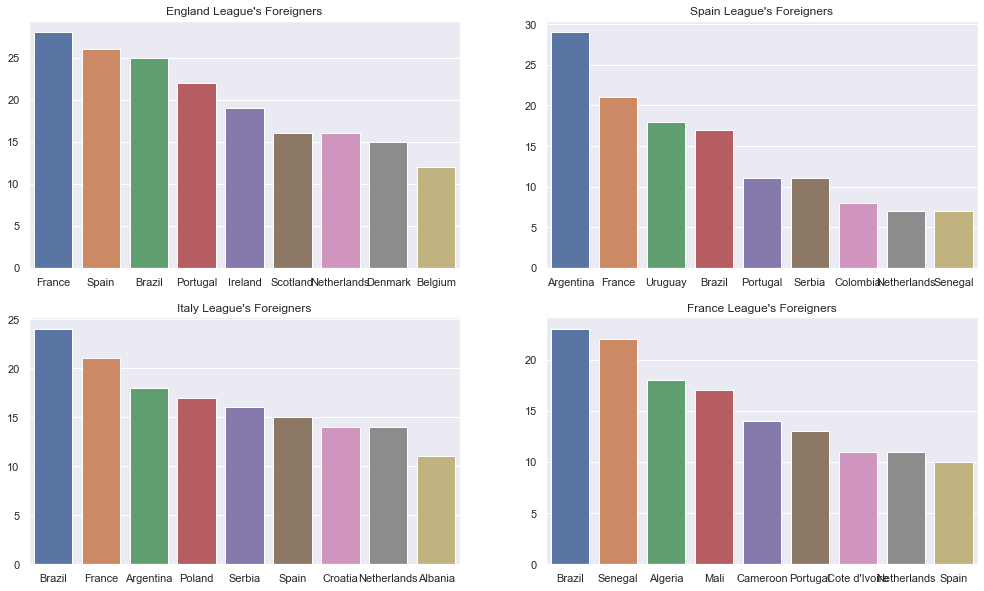

In [251]:
fig, ax =plt.subplots(2,2,figsize=(17,10))
for i,country in enumerate(["England","Spain","Italy","France"]):
    foreigners(country,ax[divmod(i,2)[0],divmod(i,2)[1]])

## Which team has the stadium with the most seats?

In [252]:
greek_league[["name","stadium_seats"]].sort_values(by="stadium_seats",ascending=False)

,name,stadium_seats
221,aek-athen,69618
218,olympiakos-piraus,32115
217,paok-thessaloniki,28703
59,iraklis-thessaloniki,27770
26,gs-ergotelis,25780
214,aris-thessaloniki,22800
22,niki-volou,22700
209,volos-nps,22700
215,panathinaikos-athen,15000
175,apollon-smyrnis,14200


# Which team has the best offense (more goals scored)? 

In [253]:
games = pd.read_csv("datasets\\football\\games.csv")
games.columns

Index(['game_id', 'competition_code', 'season', 'round', 'date',
       'home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'stadium', 'attendance',
       'referee', 'url'],
      dtype='object')

In [254]:
games = games[games.season == 2021].drop(["home_club_position", "away_club_position", "stadium", "attendance","referee", "url"], axis=1)
games.head()

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals
50415,3575344,DFL,2021,Final,2021-08-17,16,27,1,3
50417,3598319,BE1,2021,34. Matchday,2022-04-10,157,2727,5,0
50418,3730819,SUC,2021,Final,2022-01-16,621,418,0,2
50419,3597880,NL1,2021,12. Matchday,2021-11-06,467,306,1,1
50420,3578075,GBCS,2021,Final,2021-08-07,1003,281,1,0


In [255]:
games = pd.merge(games,clubs[["club_id","name"]],how = "inner",left_on = "home_club_id",right_on = "club_id")
games = pd.merge(games,clubs[["club_id","name"]], how = "inner", left_on = "away_club_id", right_on = "club_id")

In [256]:
games = games.drop(["club_id_x","club_id_y","home_club_id","away_club_id"],axis=1)
games.rename(columns={"name_x":"home","name_y":"away"},inplace=True)

In [257]:
greek_league_games = games[games.competition_code=="GR1"]

In [258]:
greek_league_games.home

2623            ofi-kreta
2624       ionikos-nikeas
2625            volos-nps
2626    aris-thessaloniki
2627      apollon-smyrnis
              ...        
4400     asteras-tripolis
4401       pas-lamia-1964
4402    paok-thessaloniki
4403         pas-giannina
4404            aek-athen
Name: home, Length: 182, dtype: object

### we create a function to extract each teams total goals in the season 

In [259]:
def goals(team):
    result = lambda x,y,z : y if x == team else z
    temp = greek_league_games [(greek_league_games.home == team) | (greek_league_games.away == team)]
    temp["goals"] = temp[["home","away","home_club_goals","away_club_goals"]].apply(lambda x: result(x.home,x.home_club_goals,x.away_club_goals),axis=1)
    return temp.goals.sum()

In [260]:
teams = pd.Series(greek_league_games.home.unique())

In [261]:
teams = pd.Series(greek_league_games.home.unique())
goals = teams.apply(goals)

C:\Users\aris\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [262]:
board = pd.DataFrame({"Team":teams,"Goals":goals}).set_index("Team").sort_values(by="Goals", ascending = False)
board

,Goals
Team,
paok-thessaloniki,50
olympiakos-piraus,47
aek-athen,42
panathinaikos-athen,41
volos-nps,35
ofi-kreta,33
aris-thessaloniki,28
pas-giannina,28
atromitos-athen,27


## Now let's examine the height distribution of players

In [263]:
players=players[players.last_season==2021]

<AxesSubplot:xlabel='height_in_cm', ylabel='Count'>

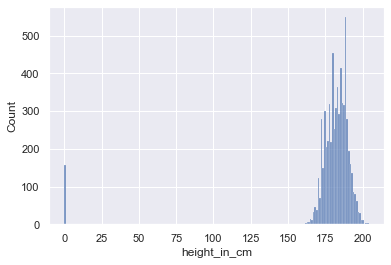

In [264]:
sns.histplot(players.height_in_cm)

### Now apparently the 0 height players are those with the unknown height so let's drop those 

In [265]:
players=players[~(players.height_in_cm==0)]

<AxesSubplot:xlabel='height_in_cm', ylabel='Count'>

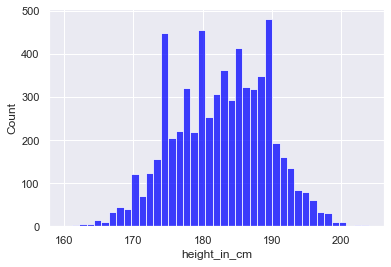

In [266]:
sns.histplot(players.height_in_cm,color="blue")

In [267]:
players.height_in_cm.describe()

count    6395.000000
mean      182.644097
std         6.819125
min       160.000000
25%       178.000000
50%       183.000000
75%       188.000000
max       204.000000
Name: height_in_cm, dtype: float64

## So my height is 166 in cm so i am curious to see how many football players have the same height as me (+-2)

In [268]:
print(f'total = {players[(164<=players.height_in_cm) & (players.height_in_cm<=168)].size}, percentage = {players[(164<=players.height_in_cm) & (players.height_in_cm<=168)].size/(players.size)}') 

total = 1177, percentage = 0.01673182173573104


# Are left footed players more valuable than the right footed ones?

In [269]:
left_footed = players[players.foot == "Left"]
right_footed = players[players.foot == "Right"]

### better to use the median to make the comparison since we have many outliers

In [270]:
left_val = left_footed["market_value_in_gbp"].median()

In [271]:
right_val = right_footed["market_value_in_gbp"].median()

### Indeed

In [272]:
print(left_val - right_val)

270000.0


In [273]:
players.columns

Index(['player_id', 'name_player', 'date_of_birth', 'club_id',
       'country_of_citizenship', 'last_season', 'market_value_in_gbp', 'foot',
       'height_in_cm', 'position', 'name_team'],
      dtype='object')

In [274]:
players.groupby("position").aggregate({"height_in_cm":"mean","market_value_in_gbp":"median","market_value_in_gbp":"median"}).sort_values(by ="market_value_in_gbp", ascending = False)

,height_in_cm,market_value_in_gbp
position,,
Attack,180.094062,1350000.0
Midfield,180.679598,1350000.0
Defender,183.703271,1080000.0
Goalkeeper,190.343008,360000.0


### We can see that height for each role is approximately the same (1.80) except for the goalkeeper.
### Also, the market value for attack and midfield players are the same but for it's less for the defenders and a lot less for the goalkeepers.

In [275]:
players.dropna(subset=["market_value_in_gbp"],inplace=True)

# Now let's examine  the correlation between the market value and the country of citizenship

In [276]:
players.groupby("country_of_citizenship").aggregate({"market_value_in_gbp":"median"}).sort_values(by = "market_value_in_gbp", ascending = False).iloc[:20]

,market_value_in_gbp
country_of_citizenship,
Libya,10800000.0
Central African Republic,9405000.0
Jamaica,7875000.0
Zimbabwe,5400000.0
Egypt,5400000.0
Dominican Republic,5400000.0
"Korea, South",5400000.0
Paraguay,4500000.0
Kenya,4050000.0


## Huh ? That's weird, are Libyan players valued so high ? I don't know any football player from Libya...

In [277]:
np.sum(players.country_of_citizenship=="Libya")

1

## ... that is because there is only one player in the dataset. So let's hold the most 30 represented countries.

In [278]:
countries30 = list(players.country_of_citizenship.value_counts().iloc[:30].index)
countries30

['France',
 'Spain',
 'Netherlands',
 'Ukraine',
 'Germany',
 'Turkey',
 'Russia',
 'Brazil',
 'Portugal',
 'England',
 'Belgium',
 'Italy',
 'Denmark',
 'Greece',
 'Scotland',
 'Argentina',
 'Sweden',
 'Serbia',
 'Nigeria',
 'Senegal',
 "Cote d'Ivoire",
 'Croatia',
 'Morocco',
 'Ghana',
 'Norway',
 'Colombia',
 'Poland',
 'United States',
 'Algeria',
 'Switzerland']

In [279]:
players[(players.country_of_citizenship.isin(countries30)) & (players.market_value_in_gbp>(10**6)*1.12)].groupby("country_of_citizenship")["market_value_in_gbp"].agg(["mean","median"]).sort_values(by="mean",ascending=False)

,mean,median
country_of_citizenship,,
England,1.504366e+07,9000000.0
Argentina,1.304182e+07,9900000.0
Brazil,1.177951e+07,5400000.0
Portugal,1.134662e+07,4500000.0
France,1.076324e+07,5400000.0
Scotland,1.009577e+07,5400000.0
Colombia,1.002706e+07,5850000.0
Italy,8.966038e+06,4500000.0
Spain,8.922040e+06,4500000.0
